In [113]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import numpy as np
from numpy import argmax, array
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import randint as sp_randint
from statsmodels.stats import weightstats as stests
import statsmodels.formula.api as sm
import statsmodels.api as sm
from pandas import plotting
from pprint import pprint
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import svm, preprocessing, metrics
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, chi2, RFECV, RFE

In [222]:
f_test = pd.read_csv('features_test.csv')
f_test.head()
f_test = f_test.drop(['Id'], 1)


In [218]:
X = pd.read_csv('features_train.csv')
X.head()
X = X.drop(['Id'], 1)

In [219]:
y = pd.read_csv('target_train.csv')
y.head()
y = y.drop(['Id'], 1)
y=y['Expected']

In [169]:
y

0       0
1       0
2       2
3       1
4       2
       ..
9995    0
9996    2
9997    2
9998    2
9999    1
Name: Expected, Length: 10000, dtype: int64

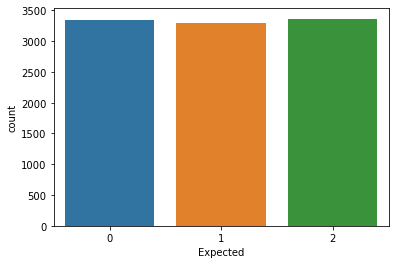

2    33.65
0    33.41
1    32.94
Name: Expected, dtype: float64

In [42]:
import seaborn as sns
sns.countplot(x='Expected', data=y)
plt.show()
y['Expected'].value_counts(normalize=True) * 100

In [43]:
X.isnull().sum()


0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Length: 120, dtype: int64

In [44]:
X.nunique()

0      10000
1      10000
2      10000
3      10000
4      10000
       ...  
115    10000
116    10000
117    10000
118    10000
119    10000
Length: 120, dtype: int64

In [276]:
f_train.hist(figsize = (15,10));
plt.subplots_adjust(hspace=0.5) 

NameError: name 'f_train' is not defined

In [48]:
corr = X.corr()

In [49]:
corr

0         1         2         3         4         5         6  \
0    1.000000 -0.015599 -0.012933 -0.001493 -0.015382  0.014127  0.007396   
1   -0.015599  1.000000  0.000906  0.006680 -0.007363 -0.019479 -0.027027   
2   -0.012933  0.000906  1.000000  0.001202 -0.017006  0.005571  0.075324   
3   -0.001493  0.006680  0.001202  1.000000  0.007359 -0.007382  0.006787   
4   -0.015382 -0.007363 -0.017006  0.007359  1.000000  0.006372 -0.005332   
..        ...       ...       ...       ...       ...       ...       ...   
115 -0.010499  0.009007  0.008512 -0.006447  0.007960  0.010911  0.005672   
116 -0.004426 -0.009603  0.007463  0.005853  0.003551 -0.007793 -0.005845   
117  0.003218 -0.008066 -0.001196  0.003376 -0.007906 -0.006547 -0.000566   
118 -0.006138 -0.010540  0.006908  0.005220 -0.009706  0.001601  0.010454   
119 -0.004562 -0.001333  0.011905  0.008259  0.001641  0.026014  0.004142   

            7         8         9  ...       110       111       112  \
0    0.008553  0.001018  0.015534  ... -0.004058  0.006076  0.007578   
1    0.001954 -0.001550 -0.003698  ...  0.002835  0.007575 -0.008660   
2    0.002713  0.000209  0.005944  ...  0.000193  0.009218  0.003152   
3   -0.012380 -0.005188  0.005138  ... -0.000321 -0.000005 -0.011194   
4    0.016353 -0.005595 -0.006037  ...  0.000993 -0.001266 -0.010510   
..        ...       ...       ...  ...       ...       ...       ...   
115 -0.011479 -0.003779  0.003674  ...  0.005369  0.006061  0.000440   
116 -0.011632  0.007013  0.001708  ... -0.013035 -0.002477  0.003534   
117 -0.006319 -0.000288  0.020838  ... -0.009779 -0.001656 -0.015238   
118  0.005447 -0.002807 -0.005250  ...  0.000747  0.004360  0.023080   
119 -0.000325  0.007925  0.015440  ... -0.004091 -0.006434  0.009826   

          113       114       115       116       117       118       119  
0    0.004994  0.011498 -0.010499 -0.004426  0.003218 -0.006138 -0.004562  
1    0.025037 -0.005706  0.009007 -0.009603 -0.008066 -0.010540 -0.001333  
2    0.002013  0.024754  0.008512  0.007463 -0.001196  0.006908  0.011905  
3    0.004422  0.002353 -0.006447  0.005853  0.003376  0.005220  0.008259  
4    0.000137  0.015092  0.007960  0.003551 -0.007906 -0.009706  0.001641  
..        ...       ...       ...       ...       ...       ...       ...  
115  0.007123 -0.003358  1.000000 -0.012936  0.002118 -0.004537 -0.015596  
116 -0.010097 -0.005135 -0.012936  1.000000  0.010797 -0.019351  0.003449  
117 -0.003608 -0.004057  0.002118  0.010797  1.000000 -0.007412 -0.001019  
118 -0.022528  0.000257 -0.004537 -0.019351 -0.007412  1.000000  0.011958  
119 -0.002273  0.009401 -0.015596  0.003449 -0.001019  0.011958  1.000000  

[120 rows x 120 columns]

In [65]:
 k = 0
df_high_corr = {}
for i in range(len(X.columns)):
    if (corr.loc[np.array(corr >= 0.95)[i]] >= 0.95).any(axis=0).sum() > 1:
        df_high_corr[k] = corr.loc[(corr.loc[np.array(corr >= 0.95)[i]] >= 0.95).any(axis=0),(corr.loc[np.array(corr >= 0.95)[i]] >= 0.95).any(axis=0)]
        k += 1

In [66]:
 df_high_corr

{}

In [54]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

In [60]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)

[[0.92115759 0.53013285 0.33248926 ... 0.09294665 1.44815289 0.15365338]
 [0.29483765 0.6377884  0.47790952 ... 0.22369544 1.26665588 0.58758726]
 [0.67253274 0.44395474 0.61890622 ... 0.51859376 1.14903772 1.17849695]
 ...
 [2.35175693 0.50789291 0.58627775 ... 1.46171847 0.28522291 0.18896709]
 [0.69553776 0.47500569 0.6014576  ... 0.13824698 1.22551709 0.58222451]
 [0.00421262 0.33299544 1.46247786 ... 0.57347152 1.62680341 0.31422374]]


In [64]:
threshold = 3
print(np.where(z > 3))


(array([   0,    2,    2, ..., 9999, 9999, 9999], dtype=int64), array([ 77,  62, 109, ...,  48,  55,  62], dtype=int64))


In [83]:
print(z[0][77])

3.1742316620454014


In [103]:
X.shape

(10000, 120)

In [30]:
(X[X.apply(lambda x: np.abs(x - x.median()) / x.std() < 6).all(axis=1)]).shape



(7981, 120)

In [86]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(X))
print(z)

[[0.92115759 0.53013285 0.33248926 ... 0.09294665 1.44815289 0.15365338]
 [0.29483765 0.6377884  0.47790952 ... 0.22369544 1.26665588 0.58758726]
 [0.67253274 0.44395474 0.61890622 ... 0.51859376 1.14903772 1.17849695]
 ...
 [2.35175693 0.50789291 0.58627775 ... 1.46171847 0.28522291 0.18896709]
 [0.69553776 0.47500569 0.6014576  ... 0.13824698 1.22551709 0.58222451]
 [0.00421262 0.33299544 1.46247786 ... 0.57347152 1.62680341 0.31422374]]


In [85]:
X.shape

(10000, 120)

In [68]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0       1.191757
1       1.434410
2      16.268331
3       1.421360
4       1.234979
         ...    
115    13.569935
116    13.725739
117     1.428539
118     0.487897
119     1.427355
Length: 120, dtype: float64


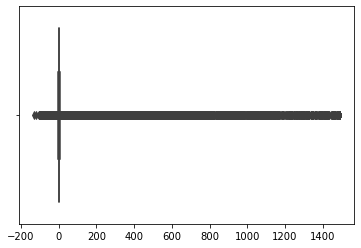

In [70]:
import seaborn as sns
sns.boxplot(x=X)

In [71]:
#X = X[(z < 3).all(axis=1)]

In [50]:
v = X.values
mask = np.abs((v - v.mean(0)) / v.std(0)) > 2
Z=pd.DataFrame(np.where(mask, np.nan, v), X.index, X.columns)

In [51]:
Z.head()

0         1          2         3         4         5          6  \
0  2.311705  0.445665   7.020637  1.582505  3.010977  1.375501  29.897623   
1  0.580430  0.200428  22.176950  0.479475  0.173418  0.106690 -28.162402   
2  0.042687  0.641976   1.663984  0.998398  1.262488  0.784453 -22.016388   
3  0.060388  1.408700        NaN  2.691115  0.645211  0.710104  12.132919   
4  1.045148  0.704313   4.823582  0.546102  0.397827  0.606078 -11.135888   

          7         8         9  ...       110       111       112       113  \
0  2.886738 -8.641869  0.414074  ...  0.642797  0.706869  0.997519  1.270321   
1  5.388960 -9.188298  1.203232  ...  1.966491  0.330869  0.449754  0.257662   
2  1.512673 -3.526049  0.176904  ...  0.897811  0.610529  0.158270       NaN   
3  1.606096 -0.782570  3.147786  ...  1.375550  0.708163  0.537862  1.357389   
4  0.639788 -9.182691  0.841208  ...       NaN  0.225400  0.672425  0.257381   

        114       115        116       117       118       119  
0  0.109460  2.829606  -8.292344  1.423754  0.090224  2.006436  
1 -1.131653 -0.908362        NaN  1.146844  0.142068  0.373541  
2  0.358590 -8.164399   0.596139  0.522287  0.832107  4.264087  
3 -1.659754 -1.105801  -6.426477  0.404628  0.452828  1.106436  
4 -0.435355  7.744958  10.908781  4.413541  0.782079  0.279165  

[5 rows x 120 columns]

In [91]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent')
imp_mean.fit(Z)
imputed_train_df = imp_mean.transform(Z)

In [92]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(Z)
values=imp_mean.transform(Z)

In [93]:
X=pd.DataFrame(values)

In [94]:
X.shape

(10000, 120)

In [95]:
X.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Length: 120, dtype: int64

In [96]:
from sklearn.ensemble import IsolationForest
import numpy as np
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(X)
preds

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


array([1, 1, 1, ..., 1, 1, 1])

In [97]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(X)
list(clusters).count(-1)

10000

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [99]:
param_grid = { 
    'estimator__n_estimators': [100],
    'estimator__max_features': ['log2'],
    'estimator__max_depth' : [1,2,3],
    'estimator__criterion' :['entropy'],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf' : [1, 2, 4],

}

In [100]:
clf = RandomForestClassifier()
estimator = clf
selector = RFE(estimator, step=1) #feature selection
pipeline_with_fs = Pipeline([('estimator', clf)])
random_search = RandomizedSearchCV(estimator = pipeline_with_fs, param_distributions = param_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1_macro')


In [101]:
random_search.fit(X, y)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  1.2min finished
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('estimator',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=None,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                                        

In [102]:
#best score
random_search.best_score_

0.46351274922802244

In [103]:
#best params
random_search.best_params_

{'estimator__n_estimators': 100,
 'estimator__min_samples_split': 2,
 'estimator__min_samples_leaf': 2,
 'estimator__max_features': 'log2',
 'estimator__max_depth': 3,
 'estimator__criterion': 'entropy'}

In [157]:
param_grid_fs = {
                            'estimator__n_estimators': [100],
                             'estimator__min_samples_split': [10],
                             'estimator__min_samples_leaf': [2],
                             'estimator__max_features': ['log2'],
                             'estimator__max_depth': [3],
                             'estimator__criterion': ['entropy']}


In [104]:
cross_fs = GridSearchCV(pipeline_with_fs, param_grid=param_grid_fs, cv=5, scoring = 'f1_macro', n_jobs= -1)

In [105]:
cross_fs.fit(X, y)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\pipeline.py:352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('estimator',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                        

In [106]:
#best score
cross_fs.best_score_

0.4538791146289629

In [115]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

param_grid2 = { 
    'estimator__n_estimators': [ 200, 2000, 10],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'feat_select__k':[10,15,12,5]
}

In [117]:
# adaboost Randomized Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest


In [118]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
selector = SelectKBest() #feature selection
pipeline_with_ada = Pipeline([('feat_select', selector), ('estimator', ada)])
random_search_ada = RandomizedSearchCV(estimator = pipeline_with_ada, 
                                   param_distributions = param_grid2, 
                                   n_iter = 100, cv = 5, 
                                   verbose=2, random_state=42, 
                                   n_jobs = -1, scoring = 'f1_macro')

In [119]:
random_search_ada.fit(X, y)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.1min finished
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('feat_select',
                                              SelectKBest(k=10,
                                                          score_func=<function f_classif at 0x0000014EDF2E4488>)),
                                             ('estimator',
                                              AdaBoostClassifier(algorithm='SAMME.R',
                                                                 base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                                       class_weight=None,
                                                                                                       criterion='gini',
                                                                                                       max_depth=1,
                                             

In [173]:
#best score
random_search_ada.best_score_

0.4887226743245058

In [174]:
random_search_ada.best_params_

{'feat_select__k': 15,
 'estimator__n_estimators': 200,
 'estimator__learning_rate': 0.1}

In [175]:
random_search_ada.best_estimator_

Pipeline(memory=None,
         steps=[('feat_select',
                 SelectKBest(k=15,
                             score_func=<function f_classif at 0x0000014EDF2E4488>)),
                ('estimator',
                 AdaBoostClassifier(algorithm='SAMME.R',
                                    base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                          class_weight=None,
                                                                          criterion='gini',
                                                                          max_depth=1,
                                                                          max_features=None,
                                                                          max_leaf_nodes=None,
                                                                          min_impurity_decrease=0.0,
                                                                          min_impurity_s

In [153]:
param_grid_new = { 
    'estimator__n_estimators': [200],
#    'estimator__learning_rate': [0.1],
    'estimator__min_child_weight': [1,2],
 #   'estimator__learning_rate': [0.1],
    'feat_select__k':[15,60,100]
}

In [158]:
clf = RandomForestClassifier()
estimator = LogisticRegression(solver='liblinear',penalty='l1',C=1.0, random_state=0)
selector = RFE(estimator, step=1) #feature selection
pipeline_with_lg = Pipeline([('feat_select', selector), ('estimator', clf)])
random_lg = RandomizedSearchCV(estimator = pipeline_with_fs, 
                                   param_distributions = param_grid_new, 
                                   n_iter = 100, cv = 3, verbose=2, 
                                   random_state=42, n_jobs = -1, 
                                   scoring = 'f1_macro')

In [159]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search = GridSearchCV(pipeline_with_lg, param_grid=param_grid_fs, cv=cv, scoring = 'f1_macro', n_jobs= -1)


In [170]:
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feat_select',
                                        RFE(estimator=LogisticRegression(C=1.0,
                                                                         class_weight=None,
                                                                         dual=False,
                                                                         fit_intercept=True,
                                                                         intercept_scaling=1,
                                                                         l1_ratio=None,
                                                                         max_iter=100,
                                                                         multi_class='auto',
                                                                         n_jobs=N

In [171]:
#best score
grid_search.best_score_

0.45365779914629567

In [177]:
param_grid3 = { 
    'estimator__n_estimators': [ 200, 2000, 10],
    'estimator__learning_rate': [0.01, 0.1, 1],
    'estimator__min_child_weight': [1,2],
    'estimator__learning_rate': [0.01, 0.1, 1],

}

In [179]:
# xgboost Randomized Search
xg = XGBClassifier(random_state=5)                                                     
selector = SelectKBest() #feature selection
pipeline_with_xg = Pipeline([('feat_select', selector), ('estimator', xg)])
random_search_xg = RandomizedSearchCV(estimator = pipeline_with_xg, 
                                   param_distributions = param_grid3, 
                                   n_iter = 100, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123), 
                                   verbose=2, random_state=42, 
                                   n_jobs = -1, scoring = 'f1_macro')

In [180]:
random_search_xg.fit(X, y)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 50.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('feat_select',
                                              SelectKBest(k=10,
                                                          score_func=<function f_classif at 0x0000014EDF2E4488>)),
                                             ('estimator',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learni.

In [181]:
random_search_xg.best_score_

0.5651087019878125

In [187]:
random_search_xg.best_params_

{'feat_select__k': 15,
 'estimator__n_estimators': 2000,
 'estimator__min_child_weight': 2,
 'estimator__learning_rate': 0.1}

In [242]:
param_grid_ = { 
    'estimator__n_estimators': [2000],
    'estimator__learning_rate': [ 0.1, 1],
    'estimator__min_child_weight': [1,2],
    'estimator__learning_rate': [0.1],

}

In [195]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
grid_search_ = GridSearchCV(pipeline_with_xg, param_grid=param_grid_, cv=cv, scoring = 'f1_macro', n_jobs= -1)

In [221]:
rs=random_search_xg.best_estimator_
rs.fit(X,y)

Pipeline(memory=None,
         steps=[('feat_select',
                 SelectKBest(k=15,
                             score_func=<function f_classif at 0x0000014EDF2E4488>)),
                ('estimator',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=2, missing=None,
                               n_estimators=2000, n_jobs=1, nthread=None,
                               objective='multi:softprob', random_state=5,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [224]:
v=rs.predict(f_test)

In [225]:
predict= pd.DataFrame(v, columns=['Predicted']).reset_index()
predict2= predict.rename(columns={"index": "Id"})
predict2.to_csv('target_test.csv',index=False)

In [202]:
random_search_xg.best_estimator_.named_steps['estimator'].feature_importances_

array([0.07657205, 0.07078757, 0.0837791 , 0.04606021, 0.08066432,
       0.04212792, 0.07742888, 0.07783671, 0.0550552 , 0.03733297,
       0.07170244, 0.06309549, 0.06193133, 0.05738842, 0.09823736],
      dtype=float32)

In [203]:
feature_list = list(X.columns)
importances = list(random_search_xg.best_estimator_.named_steps['estimator'].feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


[print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: 14              Importance: 0.10000000149011612
Variable: 0               Importance: 0.07999999821186066
Variable: 2               Importance: 0.07999999821186066
Variable: 4               Importance: 0.07999999821186066
Variable: 6               Importance: 0.07999999821186066
Variable: 7               Importance: 0.07999999821186066
Variable: 1               Importance: 0.07000000029802322
Variable: 10              Importance: 0.07000000029802322
Variable: 8               Importance: 0.05999999865889549
Variable: 11              Importance: 0.05999999865889549
Variable: 12              Importance: 0.05999999865889549
Variable: 13              Importance: 0.05999999865889549
Variable: 3               Importance: 0.05000000074505806
Variable: 5               Importance: 0.03999999910593033
Variable: 9               Importance: 0.03999999910593033


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [212]:
X.drop(X.columns[np.where(random_search_xg.best_estimator_.named_steps['feat_select'].get_support() == False)[0]], axis=1, inplace=True)

In [217]:
#Features=X.columns
[11,20,24,34,50,53,60,61,62,70,72,74,86,87,98]

In [228]:
X[Features]

11        20        24         34           50         53  \
0     2.280097 -1.015441 -4.479576  23.808472     0.063419  24.946992   
1    -5.775092 -2.875074  0.764284   5.738793    39.349176  24.299634   
2    -5.828967  4.494041  0.950084  19.629010     0.112884  19.228811   
3    -4.796236  2.786869 -1.805663  25.526839  1484.131591   0.273154   
4    -6.056380 -4.401633  0.228554   5.240953     0.212263   7.047706   
...        ...       ...       ...        ...          ...        ...   
9995  4.839613 -8.501861  4.296560   0.049944     0.050491   0.000076   
9996  3.184636  1.190503 -0.171670   2.384680    30.893745  11.645345   
9997 -0.693131 -3.218535  0.954707   6.929776   569.375242  26.466692   
9998 -1.373634 -5.069495 -0.351546  36.517062     1.529663   2.340483   
9999  7.716352  3.318978  8.258241  22.412064   125.358362   9.608465   

              60         61         62        70        72         74  \
0      52.903985   0.467676  16.306059  2.392199 -0.472142   5.125120   
1       0.103176   0.008065   4.646883  5.038892  2.106962   0.664921   
2       1.238414   0.339700  94.645030  1.476016 -7.420275  91.770769   
3      42.968391   1.581812  14.622529  3.158410  2.506215   7.526305   
4       0.022609   0.399809   8.093200  1.269895 -4.651395   1.461310   
...          ...        ...        ...       ...       ...        ...   
9995    0.027178  14.563592  29.071335  0.357843  4.816419   1.807948   
9996    0.482241   6.227008   1.280400  1.055783 -2.800251   0.220379   
9997   44.915051   0.778189   0.072010  1.116552  0.312231  22.373765   
9998    0.002341   1.153274   4.073275  1.152303 -1.549416   0.073039   
9999  148.413159   0.017262  99.037561  1.734226 -0.977757   8.406810   

            86         87        98  
0    -0.315395   1.871807  2.038736  
1    -1.230639   7.049593  0.413158  
2     6.344787   0.136055  3.701254  
3    -2.016885  10.358130  5.892810  
4     3.523166  60.634258  2.157437  
...        ...        ...       ...  
9995  5.083687   2.945173  3.235192  
9996 -0.711576  54.281120  1.795386  
9997 -0.140357  30.222037  7.920888  
9998 -0.492463   3.581384  6.473367  
9999 -0.214964   0.161841 -3.492710  

[10000 rows x 15 columns]

In [226]:
random_search_xg.best_estimator_.named_steps['feat_select'].get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [271]:
param_grid_ = { 
    'estimator__n_estimators': list(range(700,1001,50)),
    'estimator__learning_rate': np.linspace(0.0001,1,5),
    'estimator__min_child_weight': [2],


}

In [272]:
list(range(700,1001,50))

[700, 750, 800, 850, 900, 950, 1000]

In [273]:
param_grid_


{'estimator__n_estimators': [700, 750, 800, 850, 900, 950, 1000],
 'estimator__learning_rate': array([1.00000e-04, 2.50075e-01, 5.00050e-01, 7.50025e-01, 1.00000e+00]),
 'estimator__min_child_weight': [2]}

In [274]:
xg = XGBClassifier(random_state=5)                                                     
selector = SelectKBest() #feature selection
pipeline_with_x = Pipeline([('estimator', xg)])
random_search_x = RandomizedSearchCV(estimator = pipeline_with_x, 
                                   param_distributions = param_grid_, 
                                   n_iter = 100, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123), 
                                   verbose=5, random_state=42, 
                                   n_jobs = -1, scoring = 'f1_macro')

In [275]:
random_search_x.fit(X[Features],y)

C:\Users\ooles\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 35 is smaller than n_iter=100. Running 35 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 924.7min
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed: 930.4min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=123, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('estimator',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0,
                                                            learning_rate=0.1,
                                                            max_delta_step=0,
                                                            max_depth=3,
                                                            min_child_weight=

In [262]:
random_search_x.best_score_

0.5543354645796263

In [263]:
random_search_x.best_params_

{'estimator__n_estimators': 850,
 'estimator__min_child_weight': 2,
 'estimator__learning_rate': 1.0002302850208247}